# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.stats as smd
import pylab
import statsmodels.stats.weightstats


df = pd.read_csv('data/human_body_temperature.csv')

## Answer #1 Is the distribution of body temperatures normal?

In [4]:
df.head(30)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


In [5]:
temperature = df['temperature']

98.24923076923078
0.7331831580389454


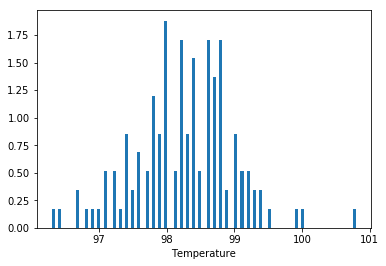

In [6]:
plt.hist(temperature, bins = 100, density = True)
plt.xlabel('Temperature')

print(temperature.mean())
print(temperature.std())
#eye ball test
#looks reasonably normal

((array([-2.55445479, -2.22902648, -2.0419783 , -1.90719589, -1.80015121,
         -1.71047373, -1.63275826, -1.56381343, -1.50159038, -1.44469181,
         -1.39212017, -1.3431372 , -1.29718048, -1.2538112 , -1.21268003,
         -1.17350409, -1.13605091, -1.10012698, -1.06556939, -1.03223961,
         -1.00001877, -0.96880405, -0.93850586, -0.90904562, -0.88035396,
         -0.85236935, -0.82503685, -0.79830725, -0.77213622, -0.74648367,
         -0.72131321, -0.69659166, -0.67228871, -0.64837651, -0.62482945,
         -0.60162387, -0.57873784, -0.55615102, -0.53384444, -0.51180041,
         -0.49000234, -0.46843466, -0.44708273, -0.42593273, -0.40497157,
         -0.38418687, -0.36356684, -0.34310027, -0.32277642, -0.30258504,
         -0.28251629, -0.2625607 , -0.24270913, -0.22295275, -0.20328303,
         -0.18369165, -0.16417053, -0.14471177, -0.12530767, -0.10595063,
         -0.08663321, -0.06734807, -0.04808795, -0.02884566, -0.00961403,
          0.00961403,  0.02884566,  0.

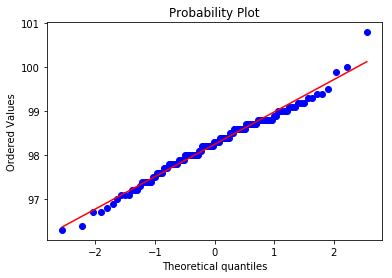

In [7]:
stats.probplot(temperature, dist='norm', plot=pylab)

In [8]:
df.info() #no nan's or empty just making sure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [9]:
zscore, p = stats.normaltest(temperature)

In [10]:
#null hypothesis is that the data is normally distributed
#alternate hypothesis is that the data is not normally distributed

#significance level = 0.05
#if p value <= significance level reject Ho
#if p value > significance level fail to reject Ho

if p > 0.05:
    print('Fail to reject Ho: Thus data is normally distributed')
    
else:
    print('Reject Ho')

Fail to reject Ho: Thus data is normally distributed


## Answer #2 Is the sample size large? Are the observations independent?

In [11]:
#The sample size of our data is 130. CLT states that if 
#you have mean and std of a population and a sufficient random sample from the pop with REPLACEMENT
#then the distribution is going to be approximately normal
#the widely agreed number is 30 though it can vary from 20-50
#since we have 130 samples our sample is large enough for CLT to hold true.

In [12]:
#body temperatures are independent of each other as everyone have their own body temperatures
#and if the experiment is in controlled environment we can deduce that the observations are independent

## Answer #3  Is the true population mean really 98.6 degrees F?

In [13]:
#bootstrap hypothesis test

In [14]:
#Ho = true pop mean is 98.6
#Ha = true pop mean is not 98.6

In [15]:
#Generate bootstrap 100,000 samples

In [16]:
def generate_bs_mean_sample(data,no_of_samples):
    """
    Returns array of means of bootstrapped samples
    """
    
    bs_replicates = np.empty(no_of_samples)
    
    size = len(bs_replicates)
    
    for i in range(size):
        bs_sample = np.random.choice(data,len(data))
        bs_replicates[i]= np.mean(bs_sample)
        
    return bs_replicates

In [17]:
s = generate_bs_mean_sample(temperature,100000)

In [18]:
p = (np.sum(s) <= 98.6) / 100000
print(np.mean(s))
print('The p value of the bootstrapped data is %d' %p)
#since p-value is 0 we should reject Null hypothesis and the true pop mean is 98.25 F

98.24936793076921
The p value of the bootstrapped data is 0


#### Frequentist statistical testing

In [19]:
t_stat = stats.ttest_1samp(temperature, 98.6)
#t statistic because population std unknown
#two tail test since it is not equal to 98.6

In [20]:
print(t_stat) 

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


In [21]:
print(t_stat.pvalue)

2.4106320415561276e-07


In [22]:
#since p value > tstat reject null hypothesis

#### Compared with Z Test

In [34]:
z_stat = statsmodels.stats.weightstats.ztest(temperature,value=98.6)
zval = z_stat[0]
z_pval = z_stat[1]
print(zval)
print(z_pval)

-5.4548232923645195
4.9021570141012155e-08


## Answer #4 Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [42]:
ten_sample = np.random.choice(temperature,10)
ten_sample

array([98.7, 98.3, 98. , 97.2, 97.8, 98.7, 97. , 99.5, 98.8, 97.4])

In [39]:
z_stat = statsmodels.stats.weightstats.ztest(ten_sample,value=98.6)
zval = z_stat[0]
z_pval = z_stat[1]
print(zval)
print(z_pval)

-2.0735295925337818
0.03812302002167472


In [43]:
t_stat = stats.ttest_1samp(ten_sample, 98.6)
print(t_stat.statistic) 
print(t_stat.pvalue)

-1.8114042589622414
0.10350427478878518


In [46]:
#its easy to see that since pop std is not known we use t test and it can be seen that
#p of t statistics is still greater than 0.05 so we use t test for samples less than 30

## Answer #5 At what temperature should we consider someone's temperature to be "abnormal"?

#### Bootstrap method

In [75]:
bs_abnormal = generate_bs_mean_sample(temperature, 100000)

In [76]:
p = (np.sum(s) <= 98.24) / 100000
bs_mean = (np.mean(bs_abnormal))
print(bs_mean)
print('The p value of the bootstrapped data is %f' %p)

98.2492256
The p value of the bootstrapped data is 0.000000


In [77]:
ci = stats.norm.interval(0.95,bs_mean,scale=0.733)
print('The confidence interval is from %f to %f' %(ci[0],ci[1]))

The confidence interval is from 96.812572 to 99.685879


In [78]:
#Therefore any value below or above these values will be considered abnormal

In [80]:
margin_error = ci[1] - bs_mean
margin_error

1.436653600667853

#### Frequentist statistical testing

In [79]:
ci_f = stats.norm.interval(0.95,98.2493,scale=0.733)
print('The confidence interval is from %f to %f' %(ci_f[0],ci_f[1]))

The confidence interval is from 96.812646 to 99.685954


In [81]:
margin_error_f = ci_f[1] - 98.2493
margin_error_f

1.436653600667853

## Answer #6 Is there a significant difference between males and females in normal temperature?

In [88]:
df['temperature'].groupby(gender).mean()

gender
F    98.393846
M    98.104615
Name: temperature, dtype: float64

In [89]:
df['temperature'].groupby(gender).std()

gender
F    0.743488
M    0.698756
Name: temperature, dtype: float64

In [91]:
male_data = df[df.gender == 'M']

In [100]:
female_data = df[df.gender == 'F']

In [101]:
male_temp = male_data.temperature

In [102]:
female_temp = female_data.temperature 

In [93]:
#Use welch T test to determine if there is a significant difference betwenn males and females in normal temperature

In [94]:
#Ho: Xm = Xf
#Ha: Xm != Xf

In [103]:
welch_test= stats.ttest_ind(male_temp,female_temp)

In [104]:
welch_test

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

In [106]:
#since p value < 0.05 we can conclude 
#that we reject Ho and that female and males have different pop means of temperature